In [27]:
# Install the required Library
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix,roc_auc_score,r2_score,mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
This dataset contains  5572 rows and 2 columns which consists with various messages with labelled as Ham or Spam
Ham which is important
Spam which is not as important as Ham
we use  this data Set to predict certain outcomes we use NLP Technique that is Using TF-IDF Technique

In [2]:
df=pd.read_table('sms.tsv', header=None, names=['label', 'message'])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape

(5572, 2)

In [7]:
df.describe(include='O')

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [15]:
mapper=(lambda x: 1 if x=='ham' else 0 for x in df['label'])

In [17]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

<AxesSubplot:ylabel='label'>

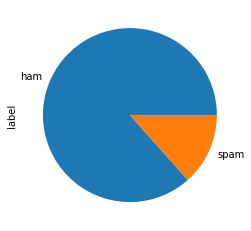

In [23]:
df.label.value_counts(normalize=True).plot(kind='pie')

In [18]:
df['label_num'] = df.label.map({'ham':0, 'spam':1})

In [24]:
df.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [25]:
X=df['message']
y=df['label_num']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)
print('X_train-',X_train.shape)
print('X_train-',X_test.shape)
print('y_train-',y_train.shape)
print('y_test',y_test.shape)

X_train- (4179,)
X_train- (1393,)
y_train- (4179,)
y_test (1393,)


In [ ]:
# Vectorising the Trained Data

In [29]:
tonum=TfidfVectorizer()

In [30]:
tonum.fit(X_train)

TfidfVectorizer()

In [32]:
# Create a DTM(Document Term Matrix)
X_train_dtm=tonum.transform(X_train)

In [37]:
pd.DataFrame(X_train_dtm.toarray(),columns=tonum.get_feature_names_out()).sample(4)

,00,000,000pes,008704050406,0089,0121,01223585236,0125698789,02,0207,...,zeros,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1
1799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
#create a DTM for X_test(sample Validation)

x_test_dtm=tonum.transform(X_test)
pd.DataFrame(x_test_dtm.toarray(),columns=tonum.get_feature_names_out()).sample(4)

,00,000,000pes,008704050406,0089,0121,01223585236,0125698789,02,0207,...,zeros,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1
897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
# Build a Model

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [42]:
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [44]:
y_pred=nb.predict(x_test_dtm)

In [52]:
print('Accuracy_Percentage--',np.round(accuracy_score(y_test,y_pred),2)*100)

Accuracy_Percentage-- 95.0


In [58]:
y_pred_prob=nb.predict_proba(x_test_dtm)[:,1]

In [59]:
print('ROC_AUC_Percentage--',np.round(roc_auc_score(y_test,y_pred_prob),2)*100)

ROC_AUC_Percentage-- 99.0


In [69]:
from sklearn.metrics import classification_report,confusion_matrix

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1201
           1       1.00      0.65      0.78       192

    accuracy                           0.95      1393
   macro avg       0.97      0.82      0.88      1393
weighted avg       0.95      0.95      0.95      1393



In [74]:
confusion_matrix(y_test,y_pred)
# 1201 and 124 are Correctly Classified messages
# 68 and 0 are Wrongly Clasified messages
# this indicates our model is better


array([[1201,    0],
       [  68,  124]], dtype=int64)

<AxesSubplot:>

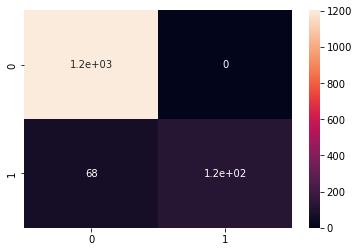

In [73]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

### compare With Different Model

In [60]:
from sklearn.linear_model import LogisticRegression
lo=LogisticRegression()
lo.fit(X_train_dtm,y_train)

LogisticRegression()

In [62]:
y_pred_log=lo.predict(x_test_dtm)
y_pred_log_prob=lo.predict_proba(x_test_dtm)[:,1]
print('Accuracy_Percentage--',np.round(accuracy_score(y_test,y_pred_log),2)*100)

Accuracy_Percentage-- 96.0


In [63]:
print('ROC_AUC_Percentage--',np.round(roc_auc_score(y_test,y_pred_log_prob),2)*100)

ROC_AUC_Percentage-- 100.0


In [ ]:
# To visulize the most common repeated words ,install WorldCloud ,if its pre installed Then dont

In [65]:
! pip install  WordCloud

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [66]:
from wordcloud import WordCloud

In [67]:
df.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


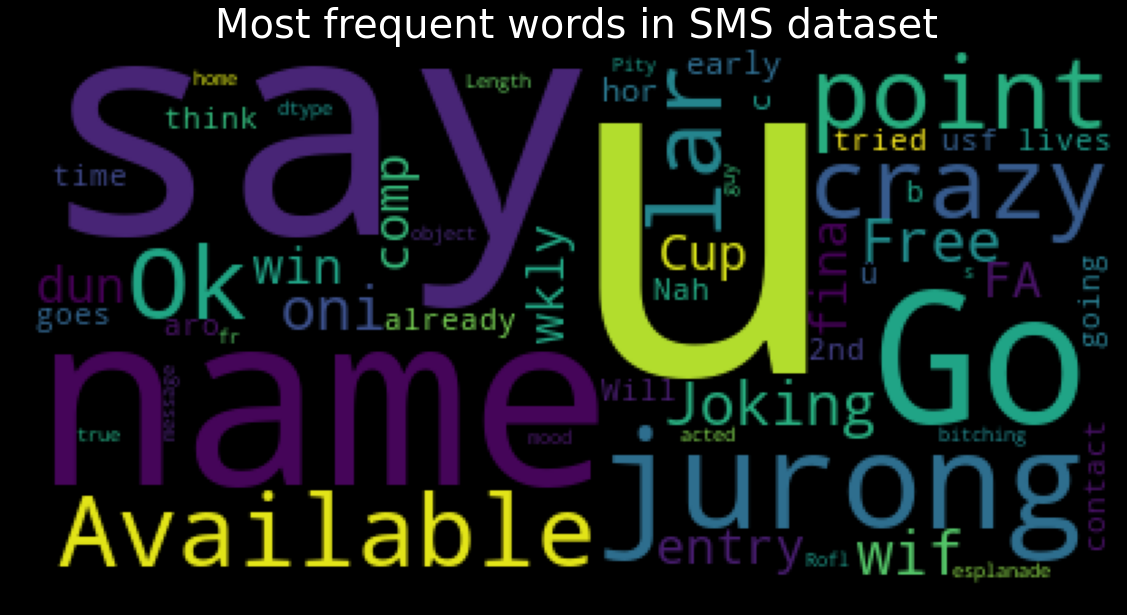

In [68]:
wc = WordCloud()
wc.generate(str(df['message']))
plt.figure(figsize=(20,10), facecolor='k')
plt.title("Most frequent words in SMS dataset", fontsize=40,color='white')
plt.imshow(wc)
plt.show()